# 3. Feature Selection


## <a class="anchor" id="0th-bullet">Table of Contents</a>


* [<b>1. Preparation</b>](#1st-bullet)<br>
    * [1.1 Import the needed libraries](#2nd-bullet)<br>
    * [1.2 Import the dataset](#3rd-bullet)<br>
    * [1.3. Data pre-processing and partition](#4th-bullet)<br>
    * [1.4. Scaling](#4.5th-bullet)<br>
    
    
* [<b>2. Feature Selection</b>](#5th-bullet)<br>
    * [2.1 Filter methods](#6th-bullet)<br>
        * 2.1.1 Univariate variables<br>
        * 2.1.2 Spearman Correlation<br>
        * 2.1.3 Chi-Square<br>
    * [2.2 Wrapper Methods](#10th-bullet)<br>
        * 2.2.1 RFE<br>
    * [2.3 Embedded Methods](#12th-bullet)<br>
        * 2.3.1 Lasso<br>
    * [2.4 Final Insights](#15th-bullet)<br>


* [<b>3. Comparing models</b>](#16th-bullet)<br>


<a class="anchor" id="1st-bullet">  
    
## 1. The needed steps  </a>

    
 [Table of Contents](#0th-bullet)





<a class="anchor" id="2nd-bullet">

### 1.1. Import the needed libraries
    
</a>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split

#scaling methods
# minmax
# standard
# robust
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# model
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="3rd-bullet">

### 1.2. Import the dataset
    
</a>

<b>1. Import the dataset __titanic.csv__ from pandas. Using the method `head()`, check the first 3 rows of the dataset.</b>

`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict survival on the Titanic

`Age` : passenger age in years <br>
`Cabin` : cabin number <br>
`Embarked` : Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton <br>
`Fare`: Passenger fare <br>
`Name` : Passenger name <br>
`Parch`: # of parents / children aboard the Titanic <br>
`PassengerId`: Passenger unique identification <br>
`Pclass`: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
`Sex`: passenger gender <br>
`SibSp`: # of siblings / spouses aboard the Titanic <br>
`Survived`: Survival (Dependent variable): 0 = No, 1 = Yes <br>
`Ticket`: Ticket number <br>
`Title`: Passenger title <br>
`Family_Size`: Number of family members onboard <br>
`Embark_Hour`: Embark Hour (from 7:00 till 20:00)<br>
`Embarked_Flag`: Embark Flag: 0 = No, 1 = Yes<br>


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,Embark_hour,Embarked_Flag
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,1,10,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,1,13,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,0,7,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,1,19,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,0,12,1


<a class="anchor" id="4th-bullet">


### 1.3. Data pre-processing, data partition and scaling

</a>



<b>2. Define the variable `PassengerId` as the new index, using the method `set_index()` from pandas.</b>

In [3]:
df = df.set_index("PassengerId")

In [4]:
df.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,Embark_hour,Embarked_Flag
PassengerId,,,,,,,,,,,,,,,
1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,1,10,1


<b>3. Check if you have any missing values in the dataset. You can use the method `info()`from pandas.</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            891 non-null    float64
 1   Cabin          204 non-null    object 
 2   Embarked       891 non-null    object 
 3   Fare           891 non-null    float64
 4   Name           891 non-null    object 
 5   Parch          891 non-null    int64  
 6   Pclass         891 non-null    int64  
 7   Sex            891 non-null    object 
 8   SibSp          891 non-null    int64  
 9   Survived       891 non-null    int64  
 10  Ticket         891 non-null    object 
 11  Title          891 non-null    object 
 12  Family_Size    891 non-null    int64  
 13  Embark_hour    891 non-null    int64  
 14  Embarked_Flag  891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 111.4+ KB


or another method is

In [43]:
df.isna().any()

Age              False
Cabin             True
Embarked         False
Fare             False
Name             False
Parch            False
Pclass           False
Sex              False
SibSp            False
Survived         False
Ticket           False
Title            False
Family_Size      False
Embark_hour      False
Embarked_Flag    False
dtype: bool

It seems that the variable "Cabin" have only 204 values in the 891 rows - we need to solve this problem of missing values (in step 6).

<b>4. Define the independent variables as `X` and the dependent variable ('Survived') as `y`. </b>

In [44]:
X = df.drop("Survived", axis=1)
y = df[["Survived"]]

In [45]:
X.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket,Title,Family_Size,Embark_hour,Embarked_Flag
PassengerId,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171,Mr,1,10,1
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599,Mrs,1,13,1


In [46]:
y.head(2)

,Survived
PassengerId,
1,0
2,1


<b>5. By using the method `train_test_split()` from sklearn.model_selection, split your dataset into train(70%) and validation(30%).<br></b>


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = .3,
    shuffle = True,
    random_state = 96
)


When a column has missing values, deleting said column is one option, but you can also fill the column with values. Be it with one specific value, or the otherwise most common value in the dataset, or through other methods.

<b>6. Fill the missing values in the variable 'Cabin' with 'Unknown'. </b>

In [48]:
t = [X_test, X_train]

for T in t:
    T['Cabin'] = T['Cabin'].fillna("Unknown")


**_Note_**: You should not use any information from the validation/test dataset to fill the missing values. 
Let's imagine that you have missing values on age and you want to fill those missing values with the median. You should compute the median value of age for the train dataset (suppose it's 35) and fill the missing values in train, validation and test set (if available) with the median in the train dataset (35).

Not every feature selection technique works for every feature - some only work for numeric features. Additionally, some data preparation processes, such as scaling (that will be performed shortly), only work with numeric features. <br>
Fortunately, `pandas` allows the selection of features of with a certain data type, or only features that _don't_ have a certain data type, thanks to the `.select_dtypes()` method. It's also possible to identify any numeric data type as `np.number` with the `numpy` library

<b>7. Define a new object named a `X_train_n` where only the numerical variables are mantained, and a object named as `X_train_c` with all the categorical independent variables, using the `.select_dtypes()` method. Do the same for the validation data. </b>

In [49]:
X_train_n = X_train.select_dtypes(exclude='O')
X_train_c = X_train.select_dtypes(include='O')

X_test_n = X_test.select_dtypes(exclude='O')
X_test_c = X_test.select_dtypes(include='O')

With the numeric and categorical fratures separated, let's move on to feature scaling.

<a class="anchor" id="4.5th-bullet">

### 1.4. Feature scaling
</a>

We have used before three different scalers:
* StandardScaler 
* MinMaxScaler 
* RobustScaler <br>

This week we'll only use RobustScaler, but you can repeat the exercise using the other scalers.

<b>8. Use the RobustScalr from sklearn.</b>


In [50]:
rb_scaler = RobustScaler().fit(X_train_n)

In [51]:
#train data
X_train_n_scl_rb = rb_scaler.transform(X_train_n) 
X_train_n_scl_rb = pd.DataFrame(X_train_n_scl_rb, columns = X_train_n.columns).set_index(X_train_n.index)
X_train_n_scl_rb.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Embarked_Flag
PassengerId,,,,,,,,
618,-0.296296,0.068273,0.0,0.0,1.0,1.0,0.285714,0.0
474,-0.518519,-0.030223,0.0,-1.0,0.0,0.0,0.000000,0.0
306,-2.154074,5.847978,2.0,-2.0,1.0,3.0,0.285714,0.0


<b>9. Using the same scaler, scale the numerical validation data.</b>


In [128]:
X_test_n_scl_rb = rb_scaler.transform(X_test_n)
X_test_n_scl_rb = pd.DataFrame(X_test_n_scl_rb, columns=X_test_n.columns)\
.set_index(X_test_n.index)
X_test_n_scl_rb.head(2)


,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Embarked_Flag
PassengerId,,,,,,,,
178,1.481481,0.606453,0.0,-2.0,0.0,0.0,-0.857143,0.0
31,0.740741,0.564137,0.0,-2.0,0.0,0.0,0.857143,0.0


$$
\exists(\phi_n)_n: \lim_n \phi_n(x)\stackrel{\text{q.o.} \forall x \in \mathbb R}=0 \land \lim_n \lVert \phi_n(x) \rVert_{L^1} = 1
$$

$$
\mathcal{N}_{\mu, \sigma^2}(x):=\frac{e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}}{|\sigma|\sqrt{2\pi} }
$$

$$
(\phi_n)_n(x):= \mathcal N_{0, \frac{1}{n^2} }(x)
$$

$$
\lim_n \phi_n(x) = 0, \forall x \in \mathbb R \diagdown \{0\}
$$

$$
\forall n \in \mathbb N, \lVert \phi_n (x) \rVert_{L^1} = \int_\mathbb R |\phi_n| = 1
$$



<b>10. RobustScaler is by no means the only scaler avaiable.</b><br/>
Last week we used RobustScaler, StandardScaler, and MinMaxScaler.

<a class="anchor" id="5th-bullet">    
    
## 2. Feature Selection
    
</a>
    
    
[Table of Contents](#0th-bullet)

<a class="anchor" id="6th-bullet">

### 2.1. Filter methods
    
</a>

### 2.1.1. Univariate variables

<b>1. Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.</b>


In [53]:
X_train_n.agg('var')

Age               180.648858
Fare             2742.834605
Parch               0.622313
Pclass              0.697207
SibSp               1.268388
Family_Size         2.666921
Embark_hour        16.651861
Embarked_Flag       0.000000
dtype: float64

The Embarked Flag is univariate. We can drop it in the train and in the validation datasets.

In [54]:
K = [X_train, X_test, X_train_n_scl_rb, X_test_n_scl_rb]
for k in K:
    try:
        k.drop('Embarked_Flag', axis=1, inplace=True)
    except:
        pass



In [55]:
X_train.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Ticket', 'Title', 'Family_Size', 'Embark_hour'],
      dtype='object')



### 2.1.2. Spearman Correlation
    


<b>2. We are going to check now the spearman correlation between the variables. First we need to create a new dataframe with all the training data, but containing also the dependent variable, so we can check if any of the independent variables are correlated with the target. Name this new dataframe as `all_train_n`. 


In [56]:
#using join, could have gone with concat
all_train_n = X_train_n_scl_rb.join(y_train)
all_train_n.head()


,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Survived
PassengerId,,,,,,,,
618,-0.296296,0.068273,0.0,0.0,1.0,1.0,0.285714,0
474,-0.518519,-0.030223,0.0,-1.0,0.0,0.0,0.000000,1
306,-2.154074,5.847978,2.0,-2.0,1.0,3.0,0.285714,1
753,0.222222,-0.213352,0.0,0.0,0.0,0.0,-0.714286,0
505,-1.037037,3.072269,0.0,-2.0,0.0,0.0,0.714286,1


<b>3. Create a function to plot the correlation between the variables named `cor_heatmap()` that should take as parameters the correlation table `cor`. Define the following conditions in the function:</b>
- the size of the figure should be (12,10)
- create a heatmap using seaborn package where: 
    - `data` should be equal to the correlation table
    - `annot = True`
    - `cmap = plt.cm.Reds`
    - `fmt='.1'`

In [57]:
def cor_heatmap(cor):
    plt.figure(figsize=(9,7))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

<b>4. Check the spearman correlation of the `all_train_n` dataset by applying the method `corr()` with the parameter `method = 'spearman'` and assign it to the object `cor_spearman`</b>


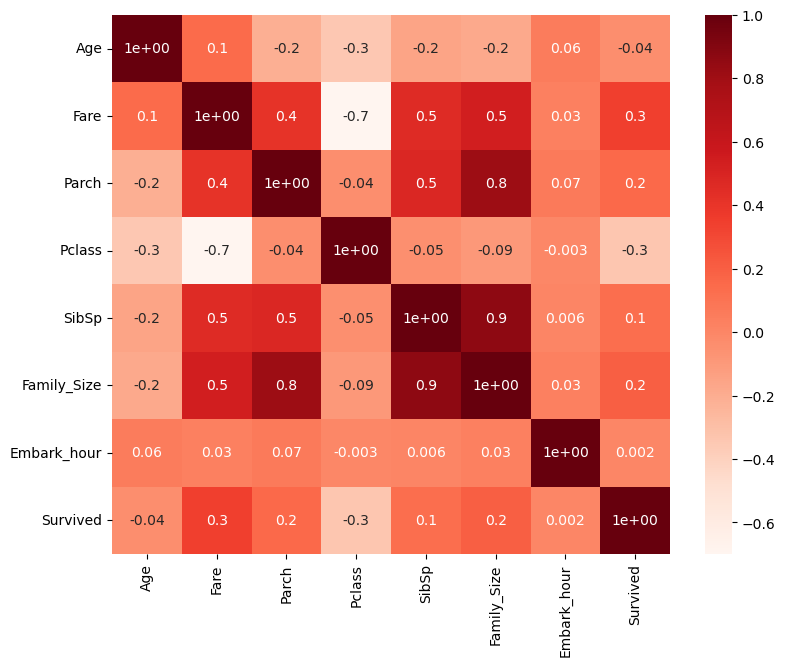

In [58]:
cor_heatmap(all_train_n.corr(method='spearman'))

<b>5. Call the function `cor_heatmap()` to the correlation table `cor_spearman`</b>

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Parch vs Family_Size (0.8) <br>
    - SibSp vs Family_Size (0.8) <br>

We need to use other techniques of feature selection to decide which variables should we keep (another possible approach was to remove the Family_Size since it is correlated with both variables, but maybe this can have a higher influence on the target).



### 2.1.3. Chi-Square for categorical data



This time we are going to check the importance of the categorical independent variables in the target. For that, we are going to use the dataset `X_train_c`.

<b>6. Run the cell below to create a function named as `TestIndependence` that should receive as arguments the dataset of independent variables, the target, the name of each independent variable and the alpha defined. This function will follow the steps of chi-square to check if a independent variable is an important predictor.</b>

In [88]:
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors.

By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arra

In [97]:
def TestIndependence(X,y,var,alpha=0.05):   
    dfObserved = pd.crosstab(index=X.index, values=y,columns=X, aggfunc="count") 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

<b>7. For all the categorical variables available on `X_train_c`, call the function `TestIndependence`.</b>

In [99]:
for var in X_train_c:
    TestIndependence(X_train_c[var],y_train, var)
    

Cabin is NOT an important predictor. (Discard Cabin from model)
Embarked is NOT an important predictor. (Discard Embarked from model)
Name is NOT an important predictor. (Discard Name from model)
Sex is NOT an important predictor. (Discard Sex from model)
Ticket is NOT an important predictor. (Discard Ticket from model)
Title is NOT an important predictor. (Discard Title from model)


According to chi-square, the only categorical variable that we should discard for the final model is the `Name`. 



### 2.1.4. Visualize the weight of the dependent variable in categorical data (EXTRA)


In this step, we are going to create two plots to check the weight that the dependent variable has in the different labels of a categorical variable. <br><br>
The first plot will represent the frequency of each value of the dependent variable in the different categories, and the second plot will make this representation more intuitive by checking the proportion of the presence of each label of the dependent variable in each category. <br><br>
Sometimes it can be useful not only to use more advanced techniques like the ones we saw previously, but also to explore visually the variables that we have, like we are going to do in this step.

While in the example given you can visualize this relation only to categorical data, you can create your own function where numerical data is split into bins to have a similar visualization.


<b>8. Run the cell below to create a function where you can visualize the proportion of the presence of each label of the dependent variable in each possible value of a categorical feature. Check the "weight" of the variable `Sex`.</b>

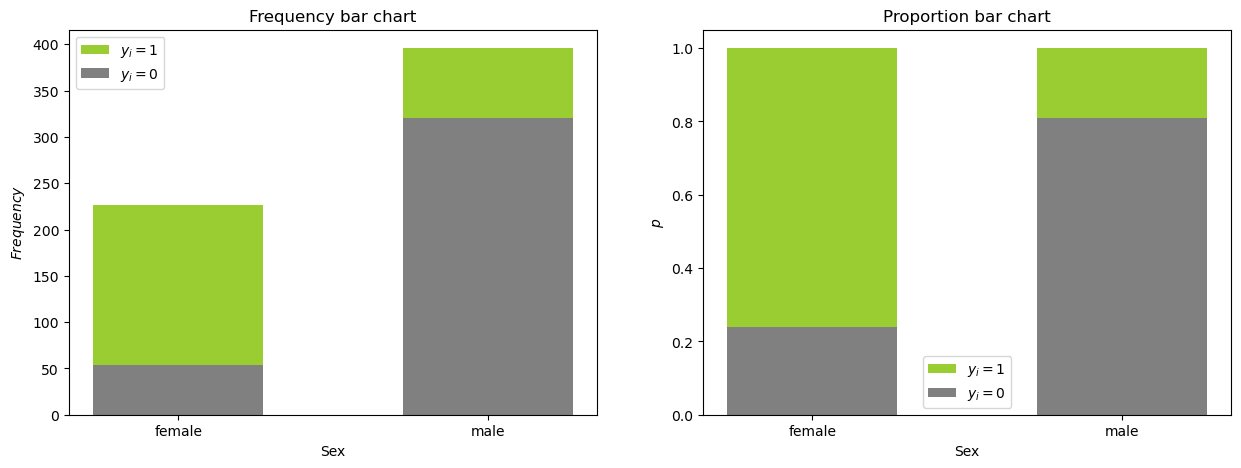

In [100]:
# Join all the training data
all_train = X_train.join(y_train)

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "Sex", "Survived")

<a class="anchor" id="10th-bullet">

### 2.2. Wrapper Methods
    
</a>



### 2.2.1. RFE
    

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.


<b>9. Using LogisticRegression, create a Logistic Regressor instance called `model`</b>

In [101]:
model = LogisticRegression()

<b>10. Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:</b>
- `estimator` = model
- `n_features_to_select` = 3 <br> <br>

- sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html'>sklearn.feature_selection.RFE()</a>

In [141]:
rfe = RFE(estimator = model, n_features_to_select = 3)

<b>11. Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to `X_train_n_scl_rb` and `y` to the dependent variable.</b>

In [142]:
rfe.fit_transform(X_train_n_scl_rb, y_train)

array([[-0.2962963 ,  0.        ,  0.        ],
       [-0.51851852,  0.        , -1.        ],
       [-2.15407407,  2.        , -2.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [-0.07407407,  0.        ,  0.        ],
       [-0.96296296,  0.        , -1.        ]])

<b>12. Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`. It will follow the column order presented in the dataframe</b>

In [143]:
#run this cell to see column order
X_train_n_scl_rb.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size',
       'Embark_hour'],
      dtype='object')

In [144]:
rfe.support_

array([ True, False,  True,  True, False, False, False])

<b>13. Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute `ranking_` to `rfe`.</b>

In [145]:
rfe.ranking_

array([1, 3, 1, 1, 2, 4, 5])

<b>14. Create an object (pandas Series) named `selected_features` that will have as index the `X_train_n_scl_rb` columns names and the `support_` attribute as value.</b> <br>
- pandas documentation: <a href = 'https://pandas.pydata.org/docs/reference/api/pandas.Series.html'>pandas.Series()</a>


In [146]:
#run cell
selected_features = pd.Series(rfe.support_, index = X_train_n_scl_rb.columns)
selected_features


Age             True
Fare           False
Parch           True
Pclass          True
SibSp          False
Family_Size    False
Embark_hour    False
dtype: bool

If you don't know apriori the number of features to select you can create a loop to check the score of the estimator using a different number of features. <br>
Below you have an example that will check the score of the estimator by chosing between 1 and 8 variables. Another option would be to use `RFECV` instead.

In [147]:
# Number of features
nof_list=np.arange(1,7)
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_n_scl_rb,y_train)
    X_val_rfe = rfe.transform(X_test_n_scl_rb)

    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.742537


According to RFE, the numerical variables that we should keep for the final model are `Age`, `Parch` and `PClass`.

<a class="anchor" id="12th-bullet">

### 2.3. Embedded Methods
    
</a>



### 2.3.1. Lasso Regression


<b>15. Create a function to plot the importance of the features named `plot_importance()` that should receive as parameters the "importance" of each variable (`coef`) and a `name` to define the title.  Define the following conditions/steps in the function:</b>
- sort the values of `coef` asn assign it to the object `imp_coef`
- the size of the figure should be (8,10)
- create a matplotlib plot `kind = barh` to plot the `imp_coef`.
- Define the title as "Feature importance using" + _the name of the model_ `name` + " Model"

In [175]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.axvline(x=0, color="red", linestyle="--")
    plt.show()

<b>16. Using LassoCV, create a Lasso Regression instance called `reg`</b>

- sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html'>sklearn.feature_selection.LassoCV()</a>

In [162]:
reg = LassoCV()

<b>17. Fit the data to `reg` by using the method `fit()` where `X` should be assigned to `X_train_n_scl_rb` and `y` to the dependent variable.</b>

In [163]:
reg.fit(X_train_n_scl_rb, y_train)

LassoCV()

<b>18. Create an object (pandas Series) named `coef` that will have as index the `data` columns names and the `coef_` attribute as value. Then, check `coef == 0`<b>

In [164]:
coef = pd.Series(reg.coef_, index = X_train_n_scl_rb.columns)
coef

Age           -0.094179
Fare           0.017443
Parch          0.050336
Pclass        -0.203789
SibSp         -0.031264
Family_Size   -0.000000
Embark_hour    0.000000
dtype: float64

In [165]:
coef.where(coef == 0).dropna()

Family_Size   -0.0
Embark_hour    0.0
dtype: float64

<b>19. Check how many variables did Lasso picked (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).<b>

In [166]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 2 variables


<b>20. Sort the values of `coef` using the method `sort_values()`.<b>

In [167]:
coef.sort_values()

Pclass        -0.203789
Age           -0.094179
SibSp         -0.031264
Family_Size   -0.000000
Embark_hour    0.000000
Fare           0.017443
Parch          0.050336
dtype: float64

<b>21. By calling the function `plot_importance()` that we created on step 15, plot the feature importance of the variables, by passing as parameters the object `coef` and the name `"Lasso"`</b>

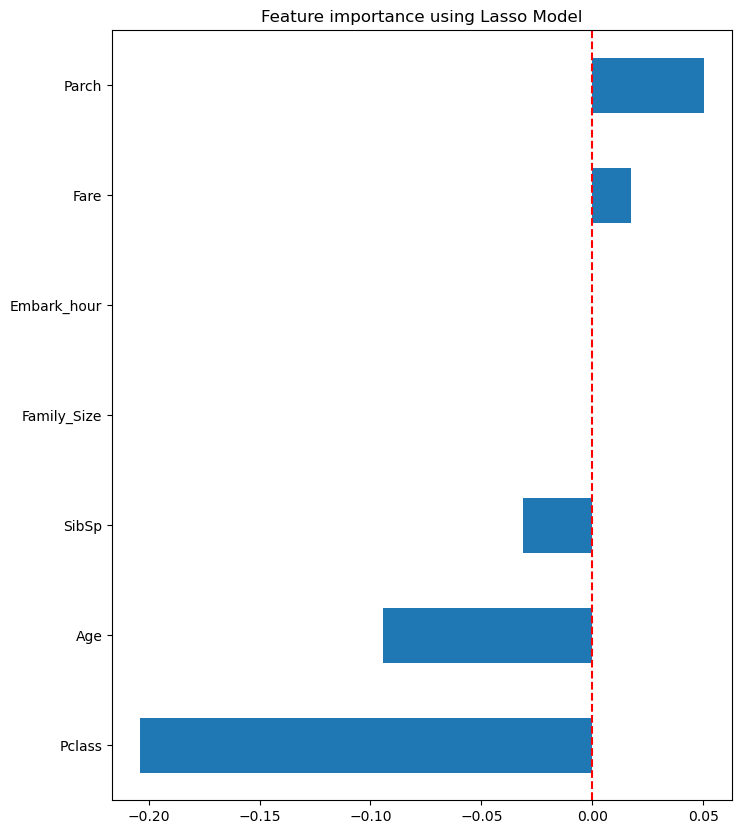

In [176]:
plot_importance(coef,'Lasso')


According to Lasso, we should discard the `Family Size`, and the `Embark_hour` seems also insignificant for the definition of the target comparing to the remaining predictors.



<a class="anchor" id="15th-bullet">

### 2.4. Final Insights:
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| Age | Discard | Keep | Keep | Include in the model |
| Fare | Discard | Discard | Keep ? | Discard |
| Parch | Discard | Keep | Keep ?| Include in the model |
| PClass | Discard | Keep | Keep | Include in the model |
| SibSp | Discard | Discard | Keep | Try with and without |
| Family_Size | Discard | Discard | Discard |  Discard |
| Embark_Hour | Discard | Discard | Discard |  Discard |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| Name | Discard|
| Sex | Keep | 
| Ticket | Keep | 
| Title | Keep |

<hr>



<a class="anchor" id="16th-bullet">

## 3. Comparing models

</a>
    
Once again, let's compare models. One using data without feature selection, and the other using data with feature selection.<br>
For the models, only numeric variables will be used this time. Although, in future classes we'll take a look at what we can do to take advantage of categoric variables in Machine Learning

<b>1. In your standard scaled data, drop the features that didn't pass the Feature Selection process, WITHOUT setting `inplace = True`, and save the result in `X_train_fs_rb`</b>

In [177]:
X_train_fs_rb = X_train_n_scl_rb.drop(['Fare','Family_Size','Embark_hour'],axis=1)


<b>2. Do the same for your validation dataset, and save the result in `X_val_fs_rb`</b>

In [178]:
#CODE HERE
X_val_fs_rb = X_test_n_scl_rb.drop(['Fare','Family_Size','Embark_hour'],axis=1)


<b>3. Repeat the last two steps, but dropping the `SibSp` feature as well. Save the results in `X_train_fs_2_rb` and `X_val_fs_2_rb`, for training and validation data respectively.</b>

In [39]:
#CODE HERE



<b>4. Create three Logistic Regressors: one for unscaled data (`lr_orig`), one fit to the scaled data (`lr_nofs`), one fit to the scaled data after feature selection (`lr_fs`)</b>

In [40]:
#CODE HERE
lr_orig = 
lr_nofs = 
lr_fs = 


<b>5. Make your predictions for all models</b>

In [41]:
#CODE HERE
#pred_orig, pred_nofs, pred_fs


<b>6. Evaluate those predictions with the classification report</b>

In [42]:
#CODE HERE


==> Unscaled data:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       162
           1       0.61      0.42      0.49       106

    accuracy                           0.66       268
   macro avg       0.65      0.62      0.62       268
weighted avg       0.65      0.66      0.65       268

==> Unscaled data, no feature selection:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       162
           1       0.61      0.42      0.49       106

    accuracy                           0.66       268
   macro avg       0.65      0.62      0.62       268
weighted avg       0.65      0.66      0.65       268

==> Unscaled data, feature selection:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       162
           1       0.61      0.41      0.49       106

    accuracy                           0.66       268
   macro avg       0.64      0

Are the changes noticeable? Which model do you think is better?